## Food Mama project: 

In [1]:
import pandas as pd
import numpy as np
import mama
import os
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the Datasets into Pandas dataframe

In [2]:
path = "datasets/"
files = os.listdir(path)

dfs = []
for file in files:
    filename = file.split("_")
    dfs.append(filename[0])
    exec(dfs[-1] + '= pd.read_csv(path + file)')

print("Name of the dataframes created: ", *dfs, sep="\n")

Name of the dataframes created: 
category
food
item
recipe


### Run `preprocessing` module to modify and to clean the dataframes (drop unnecessary columns, rename columns, replace index with "id", fill the missing data, and change data type).

In [3]:
dataframes = [food, item, recipe]
foods, items, recipes = mama.preprocessing(dataframes)
recipes.head()

,recipe_id,title,servings,ingredients,instructions,created_at,updated_at,origin,link,rating
0,9,"Salade mâche, jambon de Bayonne, mozzarella",4,4 bonne poignée de mâche \r\n40 tomate cerise ...,"Après avoir coupé en dés la mozzarella, couper...",2017-12-14 14:56:37.166524,2018-10-05 09:16:42.390163,www.marmiton.org,http://www.marmiton.org/recettes/recette_salad...,limit
1,10,Ciabattina al pesto,1,Ciabattina\r\nJambon de Parme\r\nTomates confi...,Ouvrir le pain Ciabattina en deux et tartiner ...,2017-12-14 14:56:46.270433,2018-10-05 09:16:42.45289,www.club-sandwich.net,http://www.club-sandwich.net/mobile/fiche.php?...,limit
2,402,Tortilla aux champignons et salade,4,250 g de champignons de Paris\r\r\n4 oeufs\r\r...,Préchauffer le four à 180 °C (th. 6).\r\nCoupe...,2017-12-15 16:41:37.056079,2018-10-05 09:16:42.505825,www.mangerbouger.fr,http://www.mangerbouger.fr/Manger-Mieux/Recett...,limit
3,2,Steak haché et pâtes,1,2.0 filets huile d'olive\r\n1.0 steak haché\...,"Dans une casserole, portez à ébullition un gra...",2017-12-13 16:17:24.125137,2018-10-05 09:16:42.55582,www.wecook.fr,https://www.wecook.fr/recette/steak-hache-et-p...,good
4,4,Beef Bagel,1,Pain Bagel\r\nCarpaccio de boeuf\r\nFromage fr...,Placer les tranches de carpaccio dans un plat ...,2017-12-13 17:13:29.069001,2018-10-05 09:16:42.597349,www.club-sandwich.net,http://www.club-sandwich.net/mobile/fiche.php?...,limit


### Merging tables to create a meta_data table

In [4]:
tables = [recipes, items, foods]
meta_data = mama.merging(tables)
meta_data.head()

,recipe_id,title,servings,origin,rating,food_id,name,availability,category_id,ancestry
0,9,"Salade mâche, jambon de Bayonne, mozzarella",4,www.marmiton.org,limit,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86
1,566,Sandwich Spécial Magy,1,www.club-sandwich.net,limit,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86
2,397,Salade de ravioles,2,www.mangerbouger.fr,good,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86
3,508,Sandwich Marcilhacy's,1,www.club-sandwich.net,limit,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86
4,564,Sandwich Rösti Burger,1,www.club-sandwich.net,limit,42,mâche,"01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 11, 12",14,86


### Convert string features to nominal categorical variables

In [5]:
converted = mama.converting(meta_data)
converted.head()

,recipe_id,title,servings,origin,rating,food_id,name,availability,category_id,ancestry,origin_id,availability_lst,availability_cat
0,9,"Salade mâche, jambon de Bayonne, mozzarella",4,www.marmiton.org,2,42,mâche,"5, 6, 7, 8, 9",14,86,70,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",18
1,566,Sandwich Spécial Magy,1,www.club-sandwich.net,2,42,mâche,"5, 6, 7, 8, 9",14,86,67,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",18
2,551,Bruschetta Mâche/Parmesan,1,www.club-sandwich.net,3,42,mâche,"5, 6, 7, 8, 9",14,86,67,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",18
3,1154,"Frites au four maison, guacamole, concombre, t...",1,simplyfitsociety,4,42,mâche,"5, 6, 7, 8, 9",14,86,58,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",18
4,1198,"Mâche, avocat, tomate cerise, graines de sésam...",1,faismoifondre,2,42,mâche,"5, 6, 7, 8, 9",14,86,27,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",18


### Preparing a dataframe `cluster_data` for Unsupervised learning models

- Remove seasoning ingredients by their category_ids (sauces, épices, sel, sucres, beurre, jus, alcools, levure, eau).

In [8]:
seasoning_categories = [18, 34, 37, 38, 39, 41, 42, 44, 45]
df = converted[converted['category_id'].apply(lambda x: x not in seasoning_categories)]

- Rearrange dataframe columns

In [9]:
df = df.loc[:, ['title','recipe_id','origin_id','servings','name','food_id','category_id','availability','availability_cat']]
df.rename(columns={'title':'recipe_title', 'food_id':'ingredient_id', 'category_id':'ingredient_cat'}, inplace=True)
df.head(10)

,recipe_title,recipe_id,origin_id,servings,name,ingredient_id,ingredient_cat,availability,availability_cat
0,"Salade mâche, jambon de Bayonne, mozzarella",9,70,4,mâche,42,14,"5, 6, 7, 8, 9",18
1,Sandwich Spécial Magy,566,67,1,mâche,42,14,"5, 6, 7, 8, 9",18
2,Bruschetta Mâche/Parmesan,551,67,1,mâche,42,14,"5, 6, 7, 8, 9",18
3,"Frites au four maison, guacamole, concombre, t...",1154,58,1,mâche,42,14,"5, 6, 7, 8, 9",18
4,"Mâche, avocat, tomate cerise, graines de sésam...",1198,27,1,mâche,42,14,"5, 6, 7, 8, 9",18
5,"Salade mâche, jambon de Bayonne, mozzarella",9,70,4,tomate cerise,15,14,"5, 6, 7, 8, 9",18
6,Beef Bagel,4,67,1,tomate cerise,15,14,"5, 6, 7, 8, 9",18
7,Spaghetti tomates et basilic,272,71,4,tomate cerise,15,14,"5, 6, 7, 8, 9",18
8,"Salade de pâtes aux tomates cerises, épinards ...",358,68,4,tomate cerise,15,14,"5, 6, 7, 8, 9",18
9,"Salade express haricots verts, pommes de terre...",370,68,6,tomate cerise,15,14,"5, 6, 7, 8, 9",18


 - Group dataframe by the number of ingredients used in each recipe and its availability

In [10]:
#df.groupby(['recipe_title','origin_id','servings'])['ingredient_id','availability_cat'].count()
cluster_data = df.groupby(['recipe_id','origin_id','servings'])['ingredient_id','availability_cat'].count().reset_index()
cluster_data.loc[:,'availability_cat'] = [elm[1] for elm in df.groupby('recipe_id')['availability_cat'].value_counts().keys().tolist()]
cluster_data.rename(columns={'ingredient_id': 'ingredient_count'}, inplace=True)

In [11]:
cluster_data.head()

,recipe_id,origin_id,servings,ingredient_count,availability_cat
0,2,72,1,3,43
1,3,70,8,5,18
2,4,67,1,6,18
3,5,72,2,5,34
4,6,70,6,5,43


In [13]:
cluster_data.describe()

,recipe_id,origin_id,servings,ingredient_count,availability_cat
count,1234.000000,1234.000000,1234.000000,1234.000000,1234.000000
mean,621.898703,55.969206,1.909238,4.944084,30.455429
std,359.675262,16.085256,1.469847,1.972056,13.025213
min,2.000000,0.000000,1.000000,1.000000,0.000000
25%,310.250000,42.000000,1.000000,4.000000,18.000000
50%,619.500000,67.000000,1.000000,5.000000,35.000000
75%,934.750000,71.000000,4.000000,6.000000,43.000000
max,1243.000000,73.000000,8.000000,14.000000,43.000000


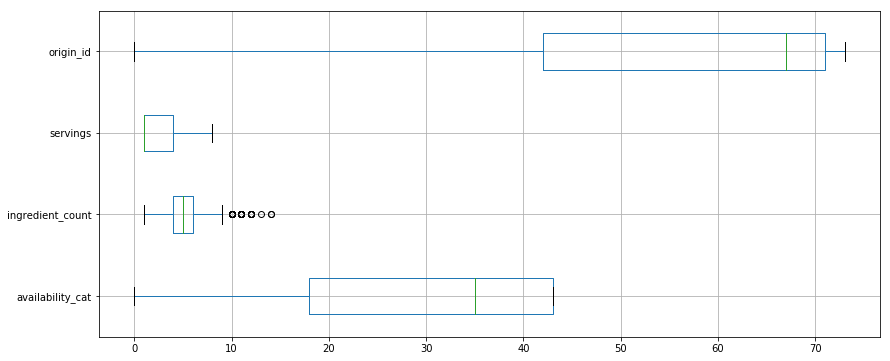

In [14]:
#plt.boxplot(cluster_data.iloc[:, 1:].T.to_numpy())
cluster_data.boxplot(column=['availability_cat','ingredient_count','servings','origin_id'], vert=False, figsize=(14,6))
plt.show()

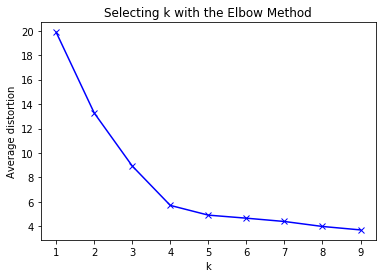

In [16]:
X = cluster_data.drop(['recipe_id'], axis=1)

# Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters = range(1,10)
meanDistortions = []

from sklearn.cluster import KMeans
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(X)
    prediction = model.predict(X)
    meanDistortions.append( sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0] )
    
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [17]:
# Optimal clusters is 4
final_model = KMeans(n_clusters=4)
final_model.fit(X)
prediction = final_model.predict(X)
 
# Join predicted clusters back to cluster_data
cluster_data["Cluster"] = prediction
cluster_data.head(10)

,recipe_id,origin_id,servings,ingredient_count,availability_cat,Cluster
0,2,72,1,3,43,0
1,3,70,8,5,18,2
2,4,67,1,6,18,2
3,5,72,2,5,34,0
4,6,70,6,5,43,0
5,7,70,4,6,22,2
6,8,72,1,3,43,0
7,9,70,4,5,18,2
8,10,67,1,4,33,0
9,11,72,1,4,43,0


/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


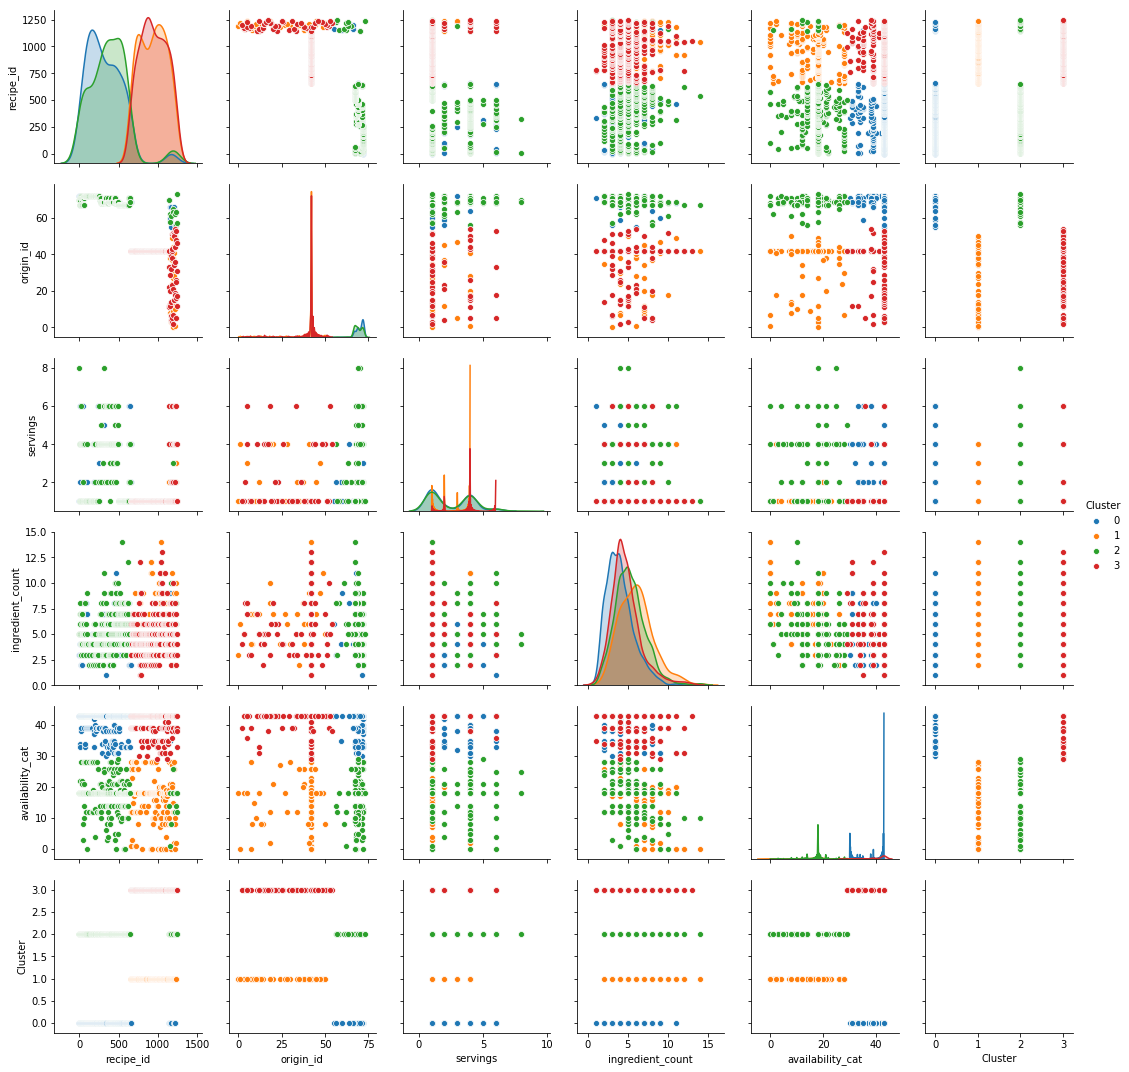

In [18]:
import seaborn as sb
sb.pairplot(cluster_data, hue='Cluster')

In [12]:
df.groupby('recipe_id')['ingredient_cat'].value_counts().unstack().fillna(0)

ingredient_cat,11,12,13,14,15,16,17,19,20,21,...,27,28,30,31,32,33,35,36,46,47
recipe_id,,,,,,,,,,,,,,,,,,,,,
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Standardize the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X = cluster_data.drop(["recipe_title","rating","name","availability_lst","ancestry"], axis=1)
x_std = ss.fit_transform(X)

### K-Means Clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(algorithm='auto', n_clusters=5, max_iter=100, random_state=0)
kmeans.fit(X)

In [ ]:
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [ ]:
plt.scatter(X.recipe_id, X.ingredient_id, c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 3], c='black', s=200, alpha=0.5)
plt.show()

In [ ]:
squared_distances_sum = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x_std)
    squared_distances_sum.append(km.inertia_)

In [ ]:
plt.plot(K, squared_distances_sum, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

- As shown with the Elbow method, optimal number of clusters is around k=5

### PCA for t-SNE model and data visualization

In [ ]:
from sklearn.decomposition import PCA
pca_3 = PCA(n_components=3)
principal_components = pca_3.fit_transform(x_std)
principal_components

### t-SNE Clustering

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=3, learning_rate=100)
transformed = model.fit_transform(principal_components)

In [ ]:
transformed

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# Plotting 3d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
z_axis = transformed[:, 2]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection='3d')

ax.scatter(x_axis, y_axis, z_axis, c='r', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

### DBSCAN Clustering

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=200)
dbscan.fit(x_std)

pca_2 = PCA(n_components=2).fit(x_std)
pca_2d = pca_2.transform(x_std)

In [ ]:
# Plot based on 5 Class and Noise
plt.figure(figsize=(8, 8))
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == -1:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='c', marker='+')
    elif dbscan.labels_[i] == 0:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == 1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='o')
    elif dbscan.labels_[i] == 2:
        c4 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='y', marker='o')
    elif dbscan.labels_[i] == 3:
        c5 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='m', marker='o')
    elif dbscan.labels_[i] == 4:
        c6 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='o')

plt.legend([c1, c2, c3, c4, c5, c6], ['Noise','Cls1', 'Cls2', 'Cls3', 'Cls4', 'Cls5'])
plt.title('DBSCAN finds 5 clusters and Noise')
plt.show()